In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
cd gdrive/MyDrive/Colab Notebooks/Journal_2/isolation

/content/gdrive/MyDrive/Colab Notebooks/Journal_2/isolation


In [4]:
dataset = pd.read_csv("isolation(without_anomaly).csv")

In [5]:
dataset['class'] = pd.get_dummies(dataset['class'], drop_first= True)

In [6]:
features = dataset.drop('class', axis = 1)
target = dataset['class']

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.30, random_state=42)

In [9]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [10]:
def confusion_matrix_func(y_test, y_pred):
  cm = confusion_matrix(y_test,y_pred)
  TP = cm[0][0]
  FP = cm[0][1]
  FN = cm[1][0]
  precision = TP/(TP+FP)
  recall = TP/(TP+FN)
  f1 = 2 * ((precision * recall)/ (precision + recall))
  print('precision: ' + "{}".format(precision))
  print('recall: '+ '{}'.format(recall))
  print('f1: '+ '{}'.format(f1))

In [11]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

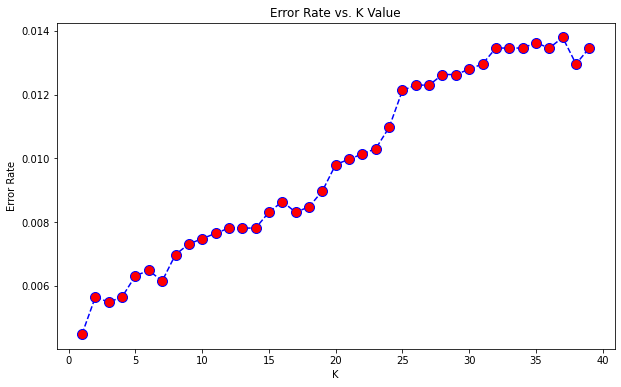

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [12]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
knn.pred = knn.predict(X_test)
print(accuracy_score(y_test,knn.pred))
confusion_matrix_func(y_test, knn.pred)

0.9955142050174448
precision: 0.9939485627836612
recall: 0.9958317544524441
f1: 0.9948892674616695


In [13]:
from sklearn.svm import SVC

In [14]:
svc = SVC(probability = True, random_state = 42)
svc.fit(X_train,y_train)
svc_pred = svc.predict(X_test)
print(accuracy_score(y_test,svc_pred))
confusion_matrix_func(y_test,svc_pred)

0.9906961289250706
precision: 0.987518910741301
recall: 0.9912680334092635
f1: 0.9893899204244032


In [15]:
from sklearn.naive_bayes import GaussianNB

In [16]:
nb = GaussianNB()
nb.fit(X_train, y_train)
nb.pred = nb.predict(X_test)
print(accuracy_score(y_test, nb.pred))
confusion_matrix_func(y_test, nb.pred)

0.9438444924406048
precision: 0.9190620272314675
recall: 0.9514487079091621
f1: 0.9349749903809157


In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
lr.pred = lr.predict(X_test)
print(accuracy_score(y_test, lr.pred))
confusion_matrix_func(y_test, lr.pred)

0.9759096195381293
precision: 0.9693645990922845
recall: 0.9756376094404263
f1: 0.9724909884272434


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [19]:
from sklearn.ensemble import AdaBoostClassifier

In [20]:
abc = AdaBoostClassifier(n_estimators=100, random_state=42)
abc.fit(X_train,y_train)
abc.pred = abc.predict(X_test)
print(accuracy_score(y_test, abc.pred))
confusion_matrix_func(y_test, abc.pred)

0.9960126266821732
precision: 0.9939485627836612
recall: 0.9969650986342944
f1: 0.9954545454545456


In [21]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [22]:
r_probs = [0 for _ in range(len(y_test))]
KNN_probs = knn.predict_proba(X_test)
SVM_probs = svc.predict_proba(X_test)
NB_probs = nb.predict_proba(X_test)
LR_probs = lr.predict_proba(X_test)
ABC_probs = abc.predict_proba(X_test)

KNN_probs = KNN_probs[:, 1]
SVM_probs = SVM_probs[:, 1]
LR_probs = LR_probs[:, 1]
NB_probs = NB_probs[:, 1]
ABC_probs = ABC_probs[:,1]

r_auc = roc_auc_score(y_test, r_probs)
KNN_auc = roc_auc_score(y_test, KNN_probs)
SVM_auc = roc_auc_score(y_test, SVM_probs)
LR_auc = roc_auc_score(y_test, LR_probs)
NB_auc = roc_auc_score(y_test, NB_probs)
ABC_auc = roc_auc_score(y_test, ABC_probs)

r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
KNN_fpr, KNN_tpr, _ = roc_curve(y_test, KNN_probs)
SVM_fpr, SVM_tpr, _ = roc_curve(y_test, SVM_probs)
LR_fpr, LR_tpr, _ = roc_curve(y_test, LR_probs)
NB_fpr, NB_tpr, _ = roc_curve(y_test, NB_probs)
ABC_fpr, ABC_tpr, _ = roc_curve(y_test, ABC_probs)

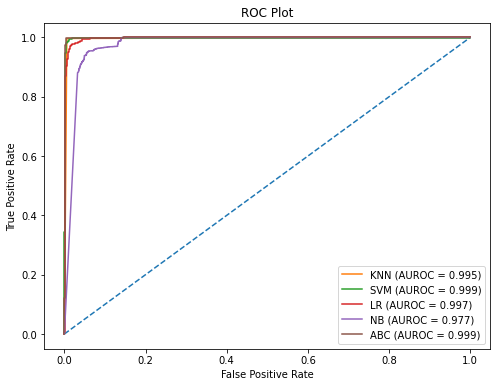

In [23]:
plt.figure(figsize=(8,6))
plt.plot(r_fpr, r_tpr, linestyle='--')
#plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest (AUROC = %0.3f)' % rf_auc)
plt.plot(KNN_fpr, KNN_tpr, label='KNN (AUROC = %0.3f)' % KNN_auc)
plt.plot(SVM_fpr, SVM_tpr, label='SVM (AUROC = %0.3f)' % SVM_auc)
plt.plot(LR_fpr, LR_tpr, label='LR (AUROC = %0.3f)' % LR_auc)
plt.plot(NB_fpr, NB_tpr, label='NB (AUROC = %0.3f)' % NB_auc)
plt.plot(ABC_fpr, ABC_tpr, label='ABC (AUROC = %0.3f)' % ABC_auc)
# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()